<a href="https://colab.research.google.com/github/DanielMSousa/curso-deeplearning-na-pratica/blob/main/Projeto_1-Celsius_para_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version = 2.x
import tensorflow as tf
tf.__version__

Unknown TensorFlow version: = 2.x
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x


'2.7.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [4]:
df = pd.read_csv('Celsius-to-Fahrenheit.csv')
df.reset_index(drop = True, inplace=True)
#apaga os índices

In [6]:
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
df.tail()

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

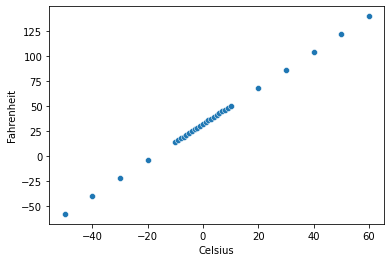

In [12]:
sns.scatterplot(x=df['Celsius'], y=df['Fahrenheit']);

# Etapa 4: Configuração da base de dados de treinamento

In [16]:
X_train = df['Celsius']
y_train = df['Fahrenheit']

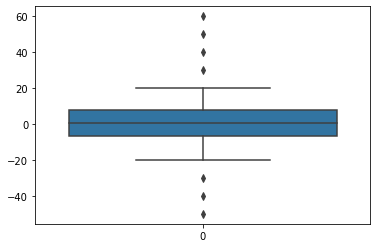

In [22]:
sns.boxplot(data=X_train);

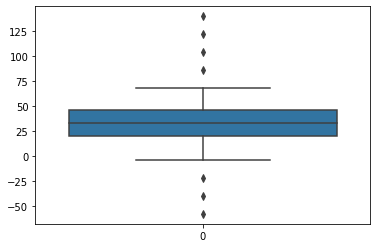

In [23]:
sns.boxplot(data=y_train);

# Etapa 5: Construção e treinamento do modelo

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss= 'mean_squared_error')

In [33]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)
#O fit retorna o histórico de treino da rede neural ao longo
#do treino, vamos armazená-lo na variável. 

Epoch 1/500
1/1 [==============================] - 0s 315ms/step - loss: 3.3703e-10
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 3.8685
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0814
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 1.4604
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 2.4676
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 1.2862
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1174
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 0.2238
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0228
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 1.2549
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7291
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 0.1285
Epoch 13/500
1/1 [==============================] 

# Etapa 5: Avaliação do modelo

In [34]:
epochs_hist.history.keys()

dict_keys(['loss'])

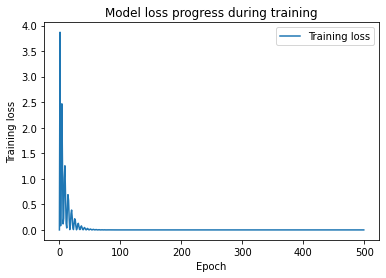

In [45]:
plt.plot(epochs_hist.history['loss']);
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [46]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [54]:
temp_c = 0
temp_f = temp_c * 9/5 + 32
temp_f_pred = model.predict([temp_c])
print(temp_f_pred[0][0], temp_f)

32.0 32.0
